# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
response_btc_data = requests.get(btc_url).json()
response_eth_data = requests.get(eth_url).json()
#response_btc_data
#my_btc_value = response_btc_data['data']['1'['quotes']['BTC']['price']
my_btc_value = response_btc_data['data']['1']['quotes']['USD']['price']
my_eth_value = response_eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value
#my_eth_value
print(my_eth_value, my_btc_value)

2096.73 33515.0


In [7]:
# Fetch current ETH price
print()
#my_eth_value = response_eth_data['data']['1']['quotes']['USD']['price']

# Compute current value of my crpto
#my_btc_value


In [8]:
value_my_btc = (my_btc_value * 1.2)

In [9]:
value_my_eth = (my_eth_value * 5.3)

In [10]:






# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${value_my_btc} ")
print(f"The current value of your {my_eth} ETH is ${value_my_eth}")

The current value of your 1.2 BTC is $40218.0 
The current value of your 5.3 ETH is $11112.669


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)


In [11]:
# Current amount of shares
#50 SPY (stocks) and 200 AGG (bonds).
shares_data = {
    "SPY": 50, "AGG":200}


In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [13]:
# Format current date as ISO format
#  # Format current date as ISO format
today = pd.Timestamp("2021-07-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
closing_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
# Preview DataFrame
# YOUR CODE HERE!
closing_prices.head(15)

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-07-06 00:00:00-04:00  115.51  115.83  115.51  115.75  7213127  433.78   

                                                            
                             high     low  close    volume  
time                                                        
2021-07-06 00:00:00-04:00  434.01  430.01  432.9  60410491

In [14]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = [ i for i in closing_prices["AGG"]["close"]][0]
spy_close_price = [ i for i in closing_prices["SPY"]["close"]][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $115.75
Current SPY closing price: $432.9


In [15]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = shares_data["SPY"]*spy_close_price
my_agg_value = shares_data["AGG"]*agg_close_price

print(f'The current value of your {shares_data["SPY"]} SPY shares is ${my_spy_value}')
print(f'The current value of your {shares_data["AGG"]} AGG shares is ${my_agg_value}')

The current value of your 50 SPY shares is $21645.0
The current value of your 200 AGG shares is $23150.0


### Savings Health Analysis

In [16]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings = {'Savings': ["Crypto" , "Shares"],
                  'Price':[52948.16 , 44761.50]
                  }


#data = {'First Column Name':  ['First value', 'Second value',...],
        #'Second Column Name': ['First value', 'Second value',...],
         #....
        #}

#df = pd.DataFrame (data, columns = ['First Column Name','Second Column Name',...])

#print (savings)
savings = pd.DataFrame(savings, columns = ['Savings' , 'Price'])

# Display savings DataFrame
savings.set_index('Savings' , inplace = True)


In [17]:
savings

,Price
Savings,
Crypto,52948.16
Shares,44761.50


array([<AxesSubplot:ylabel='Price'>], dtype=object)

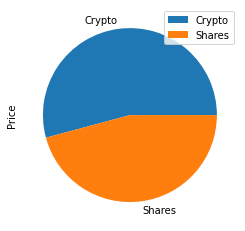

In [18]:
# Plot savings pie chart
# YOUR CODE HERE!
savings.plot(kind = 'pie' , subplots = True)

In [19]:
emergency_fund = monthly_income * 3
print(f" The current emergency fund is ${emergency_fund}")

 The current emergency fund is $36000


In [20]:
# Set ideal emergency fund


# Calculate total amount of savings
total_savings = savings['Price'].sum()
print(f"The current total savings is {total_savings}")

# Validate saving health
# YOUR CODE HERE!
if total_savings  > emergency_fund:
    print("Congratulaions, you have enough in your fund!!!")
elif df_savings == emergency_fund:
           print('congratulating the person on reaching this financial goal.')
else:
           print(f" You are $(short) from reaching your goal")
# how many dollars away the person is from reaching the goal.

The current total savings is 97709.66
Congratulaions, you have enough in your fund!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [21]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-06', tz='America/New_York').isoformat()

In [22]:
from dotenv import load_dotenv
load_dotenv()

True

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
tickers = ["AGG" , "SPY"]
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df


# Display sample data
df_ticker

AGG                                           \
                             open      high       low     close     volume   
time                                                                         
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.0000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.5600  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.5500  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.5250  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.4400  1199164.0   
...                           ...       ...       ...       ...        ...   
2021-04-30 00:00:00-04:00  114.41  114.5150  114.3300  114.5000  5160765.0   
2021-05-03 00:00:00-04:00  114.40  114.5900  114.3300  114.4000  5537985.0   
2021-05-04 00:00:00-04:00  114.55  114.7000  114.4100  114.5285  4677045.0   
2021-05-05 00:00:00-04:00  114.45  114.6200  114.4222  114.6100  3861137.0   
2021-05-06 00:00:00-04:00  114.55  114.7100  114.5300  114.6500  4557111.0   

                              SPY                                        
                             open    high      low   close       volume  
time                                                                     
2017-05-16 00:00:00-04:00     NaN     NaN      NaN     NaN          NaN  
2017-05-17 00:00:00-04:00  238.10  238.64  235.750  235.85  118613594.0  
2017-05-18 00:00:00-04:00  235.70  237.75  235.430  236.67   82965499.0  
2017-05-19 00:00:00-04:00  237.33  239.08  237.270  238.30   69366163.0  
2017-05-22 00:00:00-04:00  238.90  239.71  238.820  239.53   37630972.0  
...                           ...     ...      ...     ...          ...  
2021-04-30 00:00:00-04:00  417.63  418.54  416.340  417.30   73129109.0  
2021-05-03 00:00:00-04:00  419.43  419.84  417.665  418.18   60956273.0  
2021-05-04 00:00:00-04:00  416.08  416.60  411.670  415.64   88484568.0  
2021-05-05 00:00:00-04:00  417.38  417.63  414.940  415.72   51316402.0  
2021-05-06 00:00:00-04:00  415.83  419.21  413.675  419.08   65397203.0  

[1001 rows x 10 columns]

In [24]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [25]:
# Printing the simulation input data
MC_dist.portfolio_data.head()


AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-05-16 00:00:00-04:00  108.88  109.1010  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851.0   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534.0   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002.0   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-16 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.85   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   

                                                     
                                volume daily_return  
time                                                 
2017-05-16 00:00:00-04:00          NaN          NaN  
2017-05-17 00:00:00-04:00  118613594.0          NaN  
2017-05-18 00:00:00-04:00   82965499.0     0.003477  
2017-05-19 00:00:00-04:00   69366163.0     0.006887  
2017-05-22 00:00:00-04:00   37630972.0     0.005162

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001507,1.012272,1.010615,0.992341,1.013424,1.004759,1.006332,1.002735,1.007205,0.999468,...,0.999783,1.001828,0.990876,1.004437,1.013024,0.996923,0.993391,0.997522,1.000062,0.994938
2,1.006649,0.999930,1.008556,0.983630,1.021043,1.005472,0.998375,1.000203,1.002963,0.999067,...,1.006542,1.014441,0.988941,1.017370,1.017262,0.992634,0.993510,1.002915,0.995888,0.990746
3,1.004882,1.004948,1.004772,1.000888,1.023471,1.009848,0.989345,1.001939,0.997337,1.001797,...,1.003624,1.026129,0.979390,1.011998,1.019305,1.002924,0.999407,0.996301,0.998622,1.000412
4,1.002409,1.007665,1.006930,1.009642,1.016334,1.005835,0.993924,1.001197,1.003277,0.994712,...,1.016454,1.033706,0.974377,1.016079,1.009926,0.996392,0.999042,0.995422,0.994998,1.013911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.081770,13.738780,13.832234,9.159823,10.288322,10.738846,21.579298,19.112597,21.899363,18.411251,...,5.765722,14.520900,7.846409,6.419104,7.587922,33.804002,7.829254,21.856707,12.333943,21.511849
7557,5.074743,13.806611,13.833725,9.240723,10.240312,10.553225,21.685054,19.127846,21.696354,18.476014,...,5.784389,14.375002,7.861746,6.438343,7.620362,33.593490,7.820948,21.719393,12.219108,21.584319
7558,5.105087,13.859758,13.851400,9.242062,10.174998,10.513542,21.727659,19.130160,21.714535,18.460750,...,5.765744,14.374445,7.905701,6.483659,7.650553,33.287940,7.824428,21.841376,12.153637,21.511439
7559,5.174360,13.828822,13.904588,9.207737,10.196313,10.547922,21.694406,18.937885,21.818003,18.630749,...,5.765939,14.452958,7.894164,6.467790,7.670522,33.391484,7.819233,21.923958,12.158960,21.495779


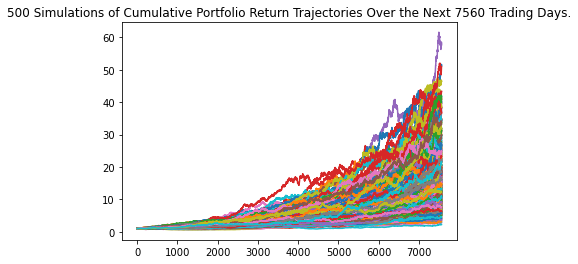

In [27]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

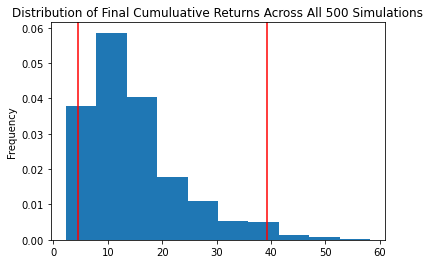

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             14.897405
std               8.945562
min               2.261815
25%               8.520429
50%              12.567972
75%              18.600046
max              58.225526
95% CI Lower      4.481495
95% CI Upper     39.252917
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [30]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will yield within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89629.9 and $785058.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [31]:
# Set initial investment
initial_investment = 20000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower1 = round(even_tbl[8]*20000,2)
ci_upper1 = round(even_tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will yield within in the range of"
      f" ${ci_lower1} and ${ci_upper1}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89629.9 and $785058.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
tickers = ["MARA" , "TSLA"]
ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*5
)


# Display sample data
ticker

MARA                                        TSLA  \
                             open    high      low    close    volume    open   
time                                                                            
2017-05-17 00:00:00-04:00   1.356   1.356   1.2080   1.2420     49906  314.54   
2017-05-18 00:00:00-04:00   1.124   1.360   1.1240   1.2000     37352  307.00   
2017-05-19 00:00:00-04:00   1.164   1.560   0.9920   1.0440    381612  315.50   
2017-05-22 00:00:00-04:00   1.180   1.180   0.6490   0.7200    676852  312.64   
2017-05-23 00:00:00-04:00   0.840   1.120   0.7600   0.9600    486066  310.46   
...                           ...     ...      ...      ...       ...     ...   
2021-04-30 00:00:00-04:00  34.980  38.550  34.6701  36.7450  21434677  667.83   
2021-05-03 00:00:00-04:00  38.130  39.680  35.2100  36.2200  16811338  703.86   
2021-05-04 00:00:00-04:00  34.880  35.240  32.2200  33.9100  13609899  678.80   
2021-05-05 00:00:00-04:00  34.420  36.230  32.9510  33.4701  14572328  681.52   
2021-05-06 00:00:00-04:00  33.590  34.110  30.0000  31.3522  13444312  680.80   

                                                                  
                               high      low     close    volume  
time                                                              
2017-05-17 00:00:00-04:00  314.6200  305.500  306.0000   5504493  
2017-05-18 00:00:00-04:00  313.9400  305.310  313.0599   4717688  
2017-05-19 00:00:00-04:00  316.5000  310.200  310.7400   3815323  
2017-05-22 00:00:00-04:00  314.3700  306.800  310.3000   3496532  
2017-05-23 00:00:00-04:00  310.7300  303.480  303.8600   3480878  
...                             ...      ...       ...       ...  
2021-04-30 00:00:00-04:00  715.4700  666.140  709.8900  38558089  
2021-05-03 00:00:00-04:00  706.0000  680.500  684.7900  25942518  
2021-05-04 00:00:00-04:00  683.4464  657.701  674.1800  27515066  
2021-05-05 00:00:00-04:00  685.2955  667.340  671.2800  20236552  
2021-05-06 00:00:00-04:00  681.0300  650.000  663.7000  26208502  

[1000 rows x 10 columns]

In [33]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002910,0.993946,1.007913,1.001361,0.995007,0.997746,1.000289,0.995697,1.013341,0.997046,...,0.994824,1.001057,0.994515,1.002768,1.003887,0.996079,1.008641,0.996371,1.007336,0.996938
2,1.000046,0.980986,1.009539,1.004878,0.993771,1.004700,1.009494,1.001560,1.012690,0.997927,...,0.982854,0.998383,1.002971,1.002614,1.008784,0.997102,1.021836,0.999900,0.999478,1.000200
3,0.998450,0.976649,1.005325,0.999709,0.991210,0.997883,1.004910,0.998717,1.005770,1.006574,...,0.988930,0.992945,1.005988,1.008950,1.001052,0.990611,1.018064,0.997250,0.998293,1.006218
4,1.000790,0.975583,1.009480,0.993453,1.006364,0.996639,1.011677,0.994928,1.009474,1.018653,...,0.992912,0.995977,1.009017,1.000086,1.008467,0.986432,1.022197,0.995850,0.997790,1.003438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.087502,1.048382,1.274107,1.498126,1.885662,0.995952,1.279073,1.484637,1.836575,3.106088,...,1.869965,1.263131,1.777552,1.420109,1.522423,1.735165,1.217995,1.053843,1.177688,1.411896
1257,1.111162,1.041616,1.275175,1.489867,1.898828,0.983441,1.299478,1.461979,1.827020,3.122176,...,1.854796,1.266053,1.771080,1.431269,1.508495,1.751398,1.222802,1.063689,1.185438,1.415754
1258,1.113211,1.039603,1.281611,1.498372,1.914073,0.987681,1.303082,1.463810,1.829675,3.142742,...,1.876901,1.263150,1.770038,1.432748,1.518080,1.734455,1.216396,1.065073,1.180608,1.414943
1259,1.101321,1.046976,1.283366,1.505264,1.918333,1.000235,1.290924,1.457104,1.829623,3.112137,...,1.886665,1.240781,1.761434,1.420288,1.505131,1.741195,1.210238,1.062164,1.176951,1.420573


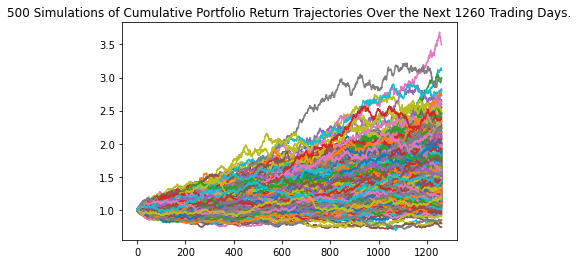

In [34]:
# Plot simulation outcomes
line_plot1 = MC_dist.plot_simulation()

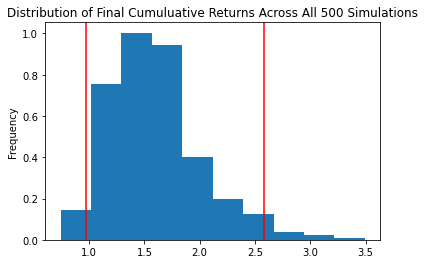

In [35]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_dist.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl1 = MC_dist.summarize_cumulative_return()


# Print summary statistics
even_tbl1

count           500.000000
mean              1.597887
std               0.412994
min               0.741622
25%               1.294606
50%               1.548392
75%               1.812903
max               3.492752
95% CI Lower      0.973757
95% CI Upper      2.581527
Name: 1260, dtype: float64

In [37]:
# Set initial investment
initial_investment1 = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower2 = round(even_tbl[8]*60000,2)
ci_upper2 = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment1} in the portfolio"
      f" over the next 5 years will yield within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $268889.71 and $2355175.01


### Ten Years Retirement Option

In [38]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)
tickers = ["MARA" , "TSLA"]
ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

MC_dist1 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.5,.5],
    num_simulation = 500,
    num_trading_days = 252*5
)


# Display sample data
ticker

MARA                                        TSLA  \
                             open    high      low    close    volume    open   
time                                                                            
2017-05-17 00:00:00-04:00   1.356   1.356   1.2080   1.2420     49906  314.54   
2017-05-18 00:00:00-04:00   1.124   1.360   1.1240   1.2000     37352  307.00   
2017-05-19 00:00:00-04:00   1.164   1.560   0.9920   1.0440    381612  315.50   
2017-05-22 00:00:00-04:00   1.180   1.180   0.6490   0.7200    676852  312.64   
2017-05-23 00:00:00-04:00   0.840   1.120   0.7600   0.9600    486066  310.46   
...                           ...     ...      ...      ...       ...     ...   
2021-04-30 00:00:00-04:00  34.980  38.550  34.6701  36.7450  21434677  667.83   
2021-05-03 00:00:00-04:00  38.130  39.680  35.2100  36.2200  16811338  703.86   
2021-05-04 00:00:00-04:00  34.880  35.240  32.2200  33.9100  13609899  678.80   
2021-05-05 00:00:00-04:00  34.420  36.230  32.9510  33.4701  14572328  681.52   
2021-05-06 00:00:00-04:00  33.590  34.110  30.0000  31.3522  13444312  680.80   

                                                                  
                               high      low     close    volume  
time                                                              
2017-05-17 00:00:00-04:00  314.6200  305.500  306.0000   5504493  
2017-05-18 00:00:00-04:00  313.9400  305.310  313.0599   4717688  
2017-05-19 00:00:00-04:00  316.5000  310.200  310.7400   3815323  
2017-05-22 00:00:00-04:00  314.3700  306.800  310.3000   3496532  
2017-05-23 00:00:00-04:00  310.7300  303.480  303.8600   3480878  
...                             ...      ...       ...       ...  
2021-04-30 00:00:00-04:00  715.4700  666.140  709.8900  38558089  
2021-05-03 00:00:00-04:00  706.0000  680.500  684.7900  25942518  
2021-05-04 00:00:00-04:00  683.4464  657.701  674.1800  27515066  
2021-05-05 00:00:00-04:00  685.2955  667.340  671.2800  20236552  
2021-05-06 00:00:00-04:00  681.0300  650.000  663.7000  26208502  

[1000 rows x 10 columns]

In [39]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_dist1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004871,1.013825,1.002738,0.989613,1.005071,0.997916,1.004895,0.999495,0.987912,0.995665,...,1.007359,0.990184,1.010312,1.007177,1.003595,1.000663,0.998160,0.995213,1.006347,0.998040
2,1.019160,1.021412,0.993429,0.979447,0.995926,1.002256,1.003120,1.002515,0.985678,1.002773,...,1.010077,0.998596,1.019028,1.014191,1.016107,0.995848,0.997863,0.995440,1.009029,0.976897
3,1.018977,1.020193,0.995781,0.980898,0.997770,1.003321,1.017309,1.002630,0.984154,1.006203,...,1.022222,0.996943,1.022158,1.031829,1.018874,0.991401,0.984814,0.992559,1.016445,0.983510
4,1.020530,1.023434,1.008255,0.978900,0.991423,0.993893,1.009444,1.010839,0.987771,1.001455,...,1.020812,0.992598,1.021812,1.029234,1.023665,1.000673,0.988997,0.987373,1.014074,0.982580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.471864,1.370997,1.751218,0.914134,1.463146,1.220825,1.524312,1.374273,2.102423,1.760475,...,1.478985,1.428372,1.614922,2.224497,1.351079,1.542593,1.185290,0.984120,2.195130,1.498759
1257,1.497524,1.370288,1.731108,0.916488,1.463877,1.219607,1.518597,1.369097,2.112623,1.755010,...,1.469609,1.405268,1.618180,2.241901,1.350721,1.546602,1.194145,0.995600,2.177892,1.510376
1258,1.512208,1.356068,1.716680,0.918417,1.461129,1.229101,1.521666,1.372613,2.120942,1.745813,...,1.469531,1.403167,1.606539,2.227955,1.348870,1.545607,1.189109,0.986530,2.178794,1.498279
1259,1.502719,1.338189,1.708248,0.926139,1.458406,1.224700,1.514002,1.376519,2.129332,1.750537,...,1.483288,1.411340,1.600009,2.232623,1.341779,1.545712,1.190258,0.993595,2.197202,1.490979


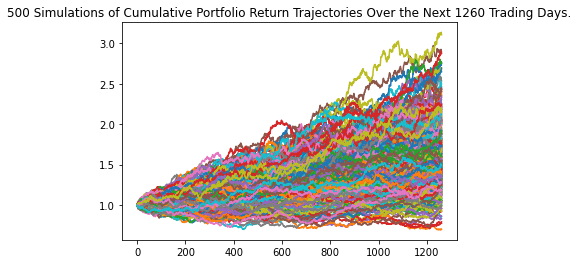

In [40]:
# Plot simulation outcomes
line_plot2 = MC_dist1.plot_simulation()

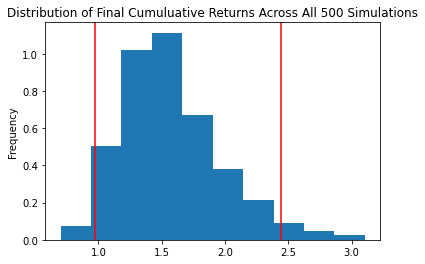

In [41]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_dist1.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl2 = MC_dist1.summarize_cumulative_return()
even_tbl2

count           500.000000
mean              1.572272
std               0.388399
min               0.700509
25%               1.300429
50%               1.507720
75%               1.778835
max               3.105574
95% CI Lower      0.971527
95% CI Upper      2.445984
Name: 1260, dtype: float64

In [44]:
# Set initial investment
# YOUR CODE HERE!# Set initial investment
initial_investment2 = 35000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower3 = round(even_tbl[8]*60000,2)
ci_upper3 = round(even_tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 5 years will yield within in the range of"
      f" ${ci_lower3} and ${ci_upper3}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 5 years will yield within in the range of $268889.71 and $2355175.01
